In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

# Prepare

In [42]:
# El Kart Biniş Sayısı
el_kart_binis_2020 = pd.read_csv("gdrive/MyDrive/Data/Konya Ulaşım/3_202106_elkartbinis2020.csv", sep=";")
el_kart_binis_2020.columns=["ANA_HAT_NO", "ALT_HAT_NO", "TARIH","SAAT", "BİNİŞ SAYISI"]

In [47]:
# Numeric to String
el_kart_binis_2020["ANA_HAT_NO"] = el_kart_binis_2020["ANA_HAT_NO"].apply(str)
el_kart_binis_2020["ALT_HAT_NO"] = el_kart_binis_2020["ALT_HAT_NO"].apply(str)
el_kart_binis_2020["TARIH"] = el_kart_binis_2020["TARIH"].apply(str)
el_kart_binis_2020["SAAT"] = el_kart_binis_2020["SAAT"].apply(str)

In [59]:
# String Date to Datetime Format
dates=list(el_kart_binis_2020["TARIH"])
el_kart_binis_2020["TARIH"] = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

In [87]:
# Tranform Date to Weekdays
dates = el_kart_binis_2020["TARIH"]
weekday = []
for day in dates:
  if day.weekday() == 0:
    weekday.append("Monday")
  if day.weekday() == 1:
    weekday.append("Tuesday")
  if day.weekday() == 2:
    weekday.append("Wednesday")
  if day.weekday() == 3:
    weekday.append("Thursday")
  if day.weekday() == 4:
    weekday.append("Friday")
  if day.weekday() == 5:
    weekday.append("Saturday")
  if day.weekday() == 6:
    weekday.append("Sunday")

el_kart_binis_2020["GÜN"] = weekday


In [99]:
# Transform Date to Months
dates = dates.apply(str)
month = []
for i in range(dates.shape[0]):
  month_num = dates.iloc[i][-5:-3]
  datetime_object = dt.datetime.strptime(month_num, "%m")
  month_name = datetime_object.strftime("%b")
  month.append(month_name)

el_kart_binis_2020["AY"] = month

In [100]:
el_kart_binis_2020

ANA_HAT_NO ALT_HAT_NO       TARIH SAAT  BİNİŞ SAYISI        GÜN   AY
0               1          0  2020-01-01    0            29  Wednesday  Jan
1               1          0  2020-01-01    6            13  Wednesday  Jan
2               1          0  2020-01-01    7            32  Wednesday  Jan
3               1          0  2020-01-01    8            71  Wednesday  Jan
4               1          0  2020-01-01    9            73  Wednesday  Jan
...           ...        ...         ...  ...           ...        ...  ...
675377         99          0  2020-12-31   19            35   Thursday  Dec
675378         99          0  2020-12-31   20             6   Thursday  Dec
675379         99          0  2020-12-31   21            10   Thursday  Dec
675380         99          0  2020-12-31   22             1   Thursday  Dec
675381         99          0  2020-12-31   23             5   Thursday  Dec

[675382 rows x 7 columns]

# Visualization

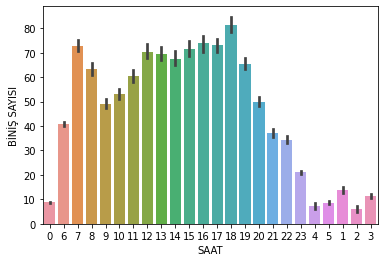

In [48]:
# Bar Plot SAAT
sns.barplot(x = "SAAT", y = "BİNİŞ SAYISI", data = el_kart_binis_2020);

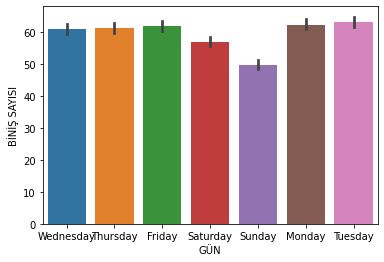

In [77]:
# Bar Plot GÜN
sns.barplot(x = "GÜN", y = "BİNİŞ SAYISI", data = el_kart_binis_2020);

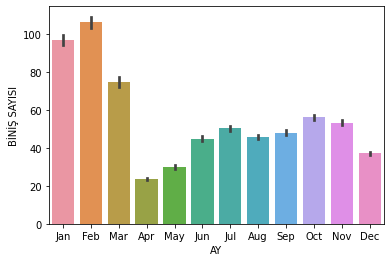

In [104]:
# Bar Plot AY
sns.barplot(x = "AY", y = "AY", data = el_kart_binis_2020);

In [105]:
import plotly.express as px
fig = px.bar(el_kart_binis_2020, x='AY', y='BİNİŞ SAYISI')
fig.show()

# Try